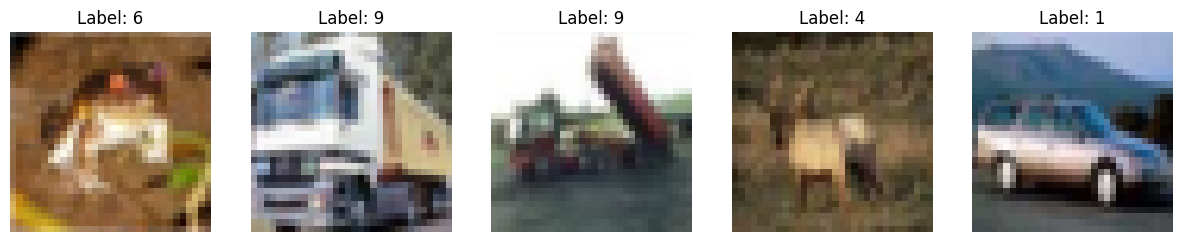

In [5]:
import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded CIFAR-10 dataset
cifar10_dataset_path = '/content/cifar-10-python.tar.gz'

# Extract the dataset
with tarfile.open(cifar10_dataset_path, 'r:gz') as tar:
    tar.extractall(path='/content')

# Load one batch of the dataset (for example, the training batch)
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    return batch

# Example: Load the first batch
batch1 = load_cifar10_batch('/content/cifar-10-batches-py/data_batch_1')

# Extracting images and labels
images = batch1[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
labels = batch1[b'labels']

# Function to visualize images
def visualize_cifar10(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Visualize the first few images
visualize_cifar10(images, labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


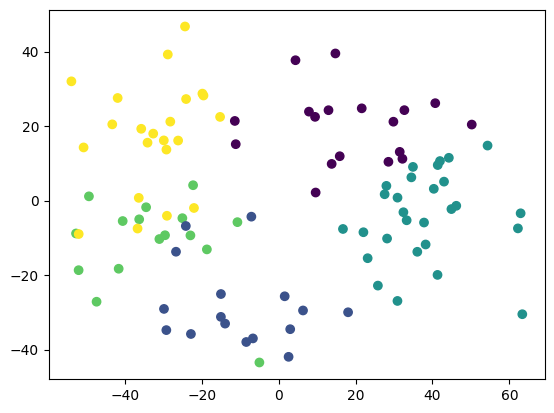

In [7]:
import torch
from torchvision import models, transforms
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

# Load the CIFAR-10 data
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load one batch for demonstration purposes
batch = unpickle('/content/cifar-10-batches-py/data_batch_1')
data = batch[b'data']
labels = batch[b'labels']

# Convert CIFAR data to image
def cifar_to_img(cifar_data):
    img = cifar_data.reshape(3, 32, 32).transpose(1, 2, 0)
    return Image.fromarray(img)

# Load a pre-trained model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Extract features from a CIFAR image
def get_image_embedding(cifar_data, model, transform):
    image = cifar_to_img(cifar_data)
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(image)
    return embedding.numpy().flatten()  # Flatten the embedding

# Process a subset of the CIFAR images
subset_size = 100
embeddings = np.array([get_image_embedding(data[i], model, transform) for i in range(subset_size)])

# Flatten the embeddings to 2D for KMeans
embeddings_2d = embeddings.reshape(len(embeddings), -1)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings_2d)

# Visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_2d)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_)
plt.show()